## Data Exploration for Integrated Dataset

INTEGRATED DATASET EXPLORATION - TRAINING SET (2020-2023)
📁 Output folder: graphical analysis/integrated_data

📊 Dataset Overview:
   Total voyages: 1,308,221
   Date range: 2020-01-01 to 2023-12-31
   Features: 49
   Years: [2020, 2021, 2022, 2023]

1. TARGET VARIABLE ANALYSIS


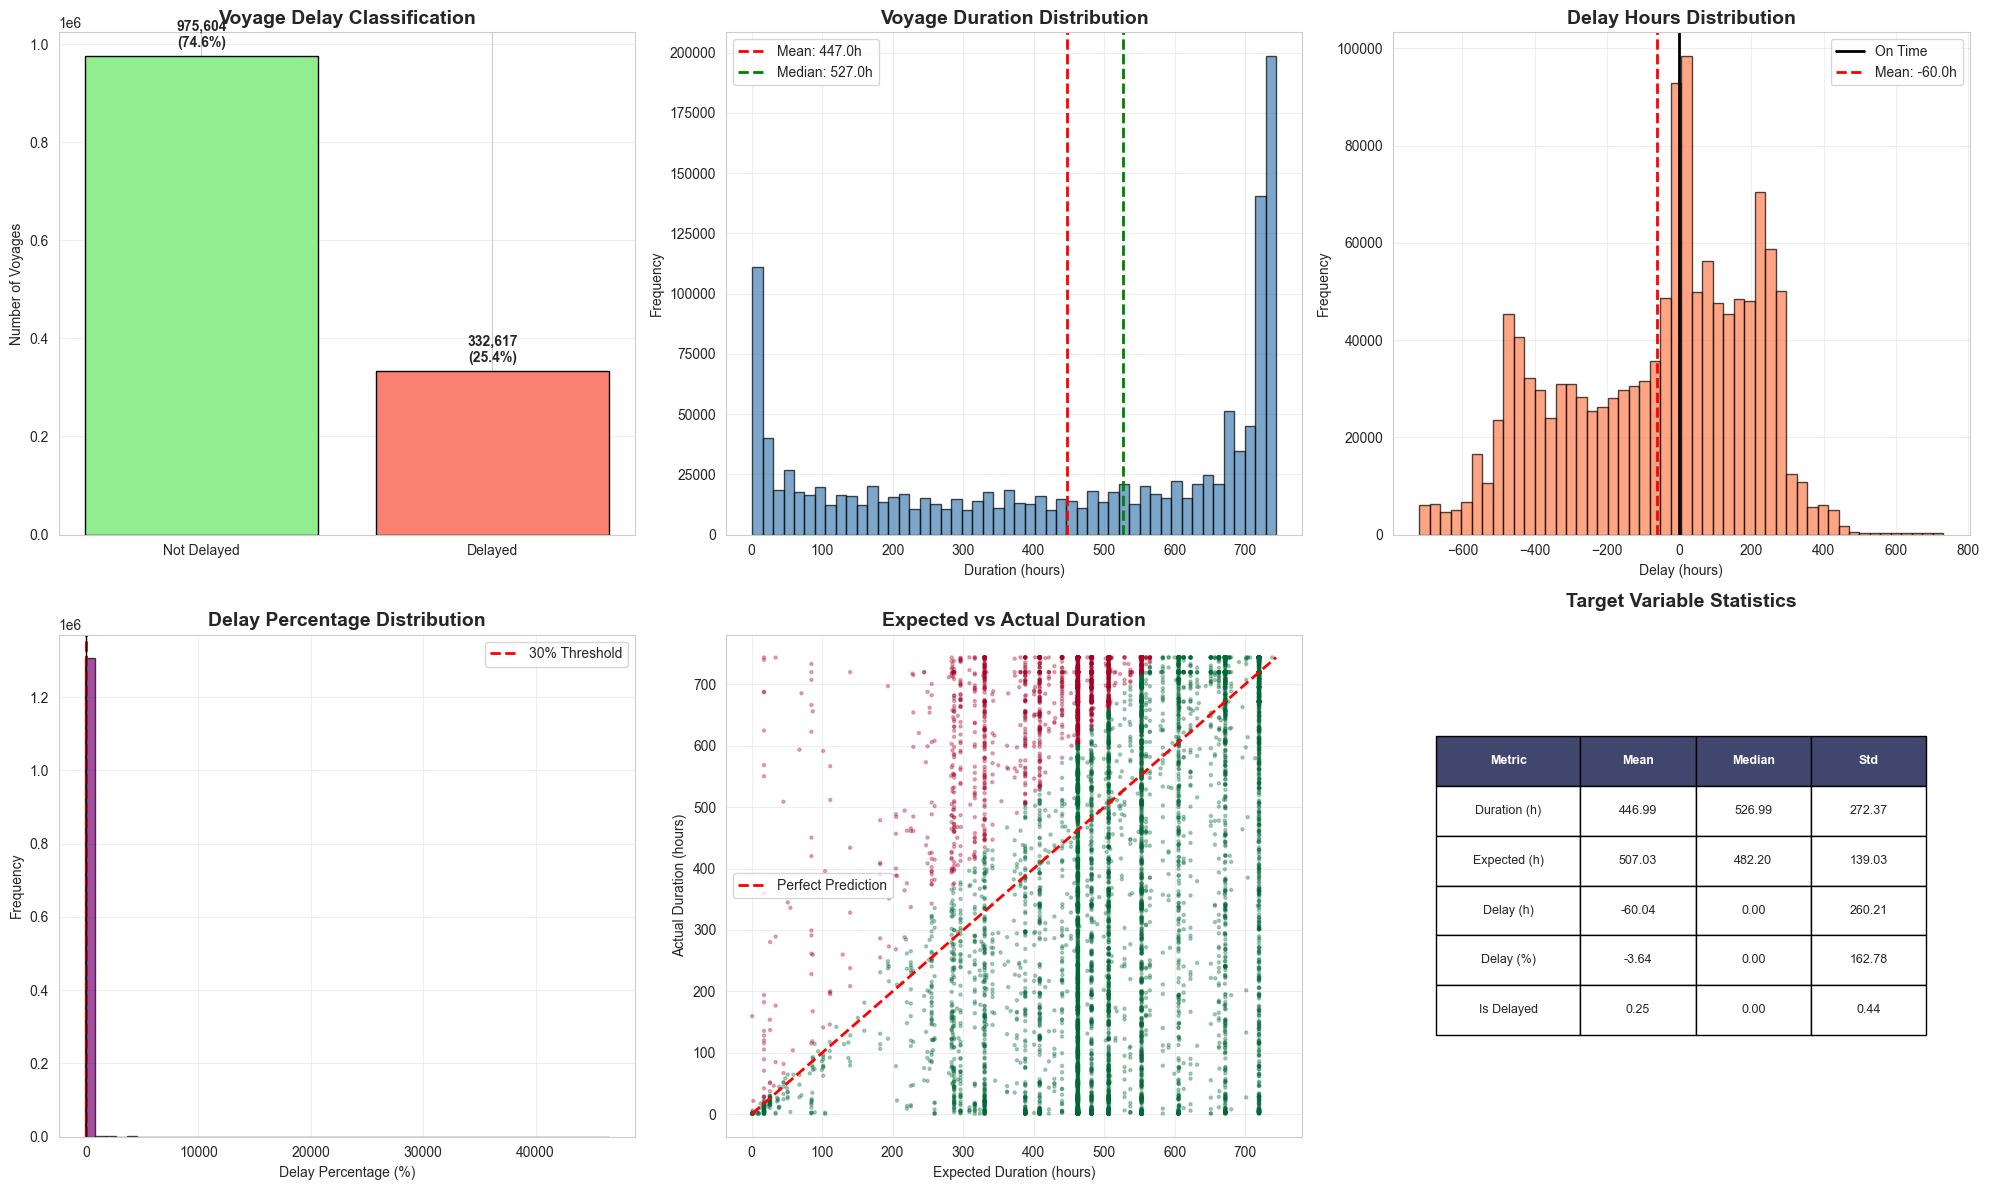


🎯 Target Variable Statistics:
   Delayed voyages: 332,617 (25.4%)
   Average duration: 447.0h (median: 527.0h)
   Average delay: -60.0h (median: 0.0h)

2. TEMPORAL PATTERNS OF DELAYS


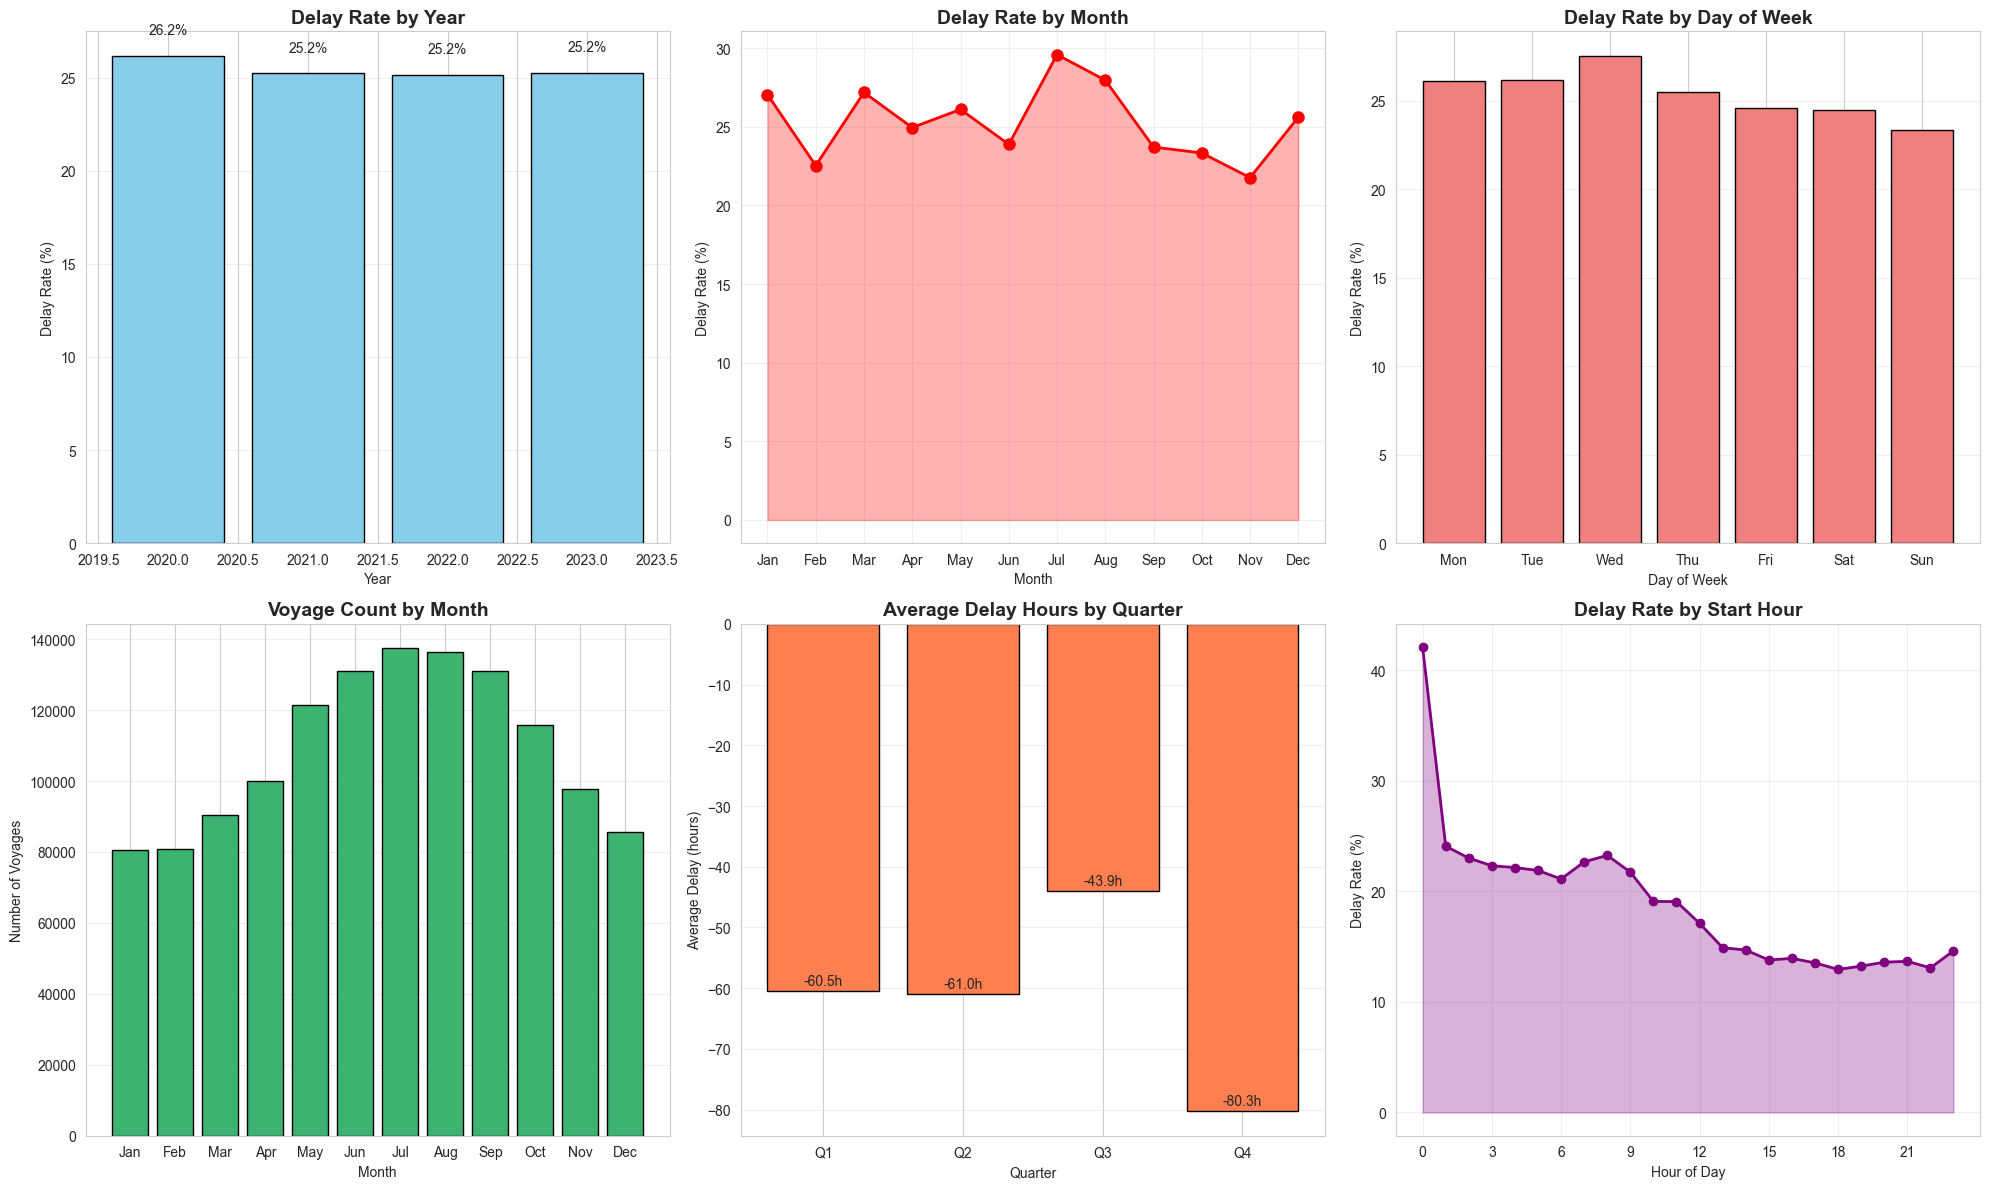


📅 Temporal Insights:
   Highest delay rate: Jul (29.6%)
   Lowest delay rate: Nov (21.8%)
   Busiest month: Jul (137,447 voyages)

3. FEATURE CORRELATIONS WITH DELAY TARGET


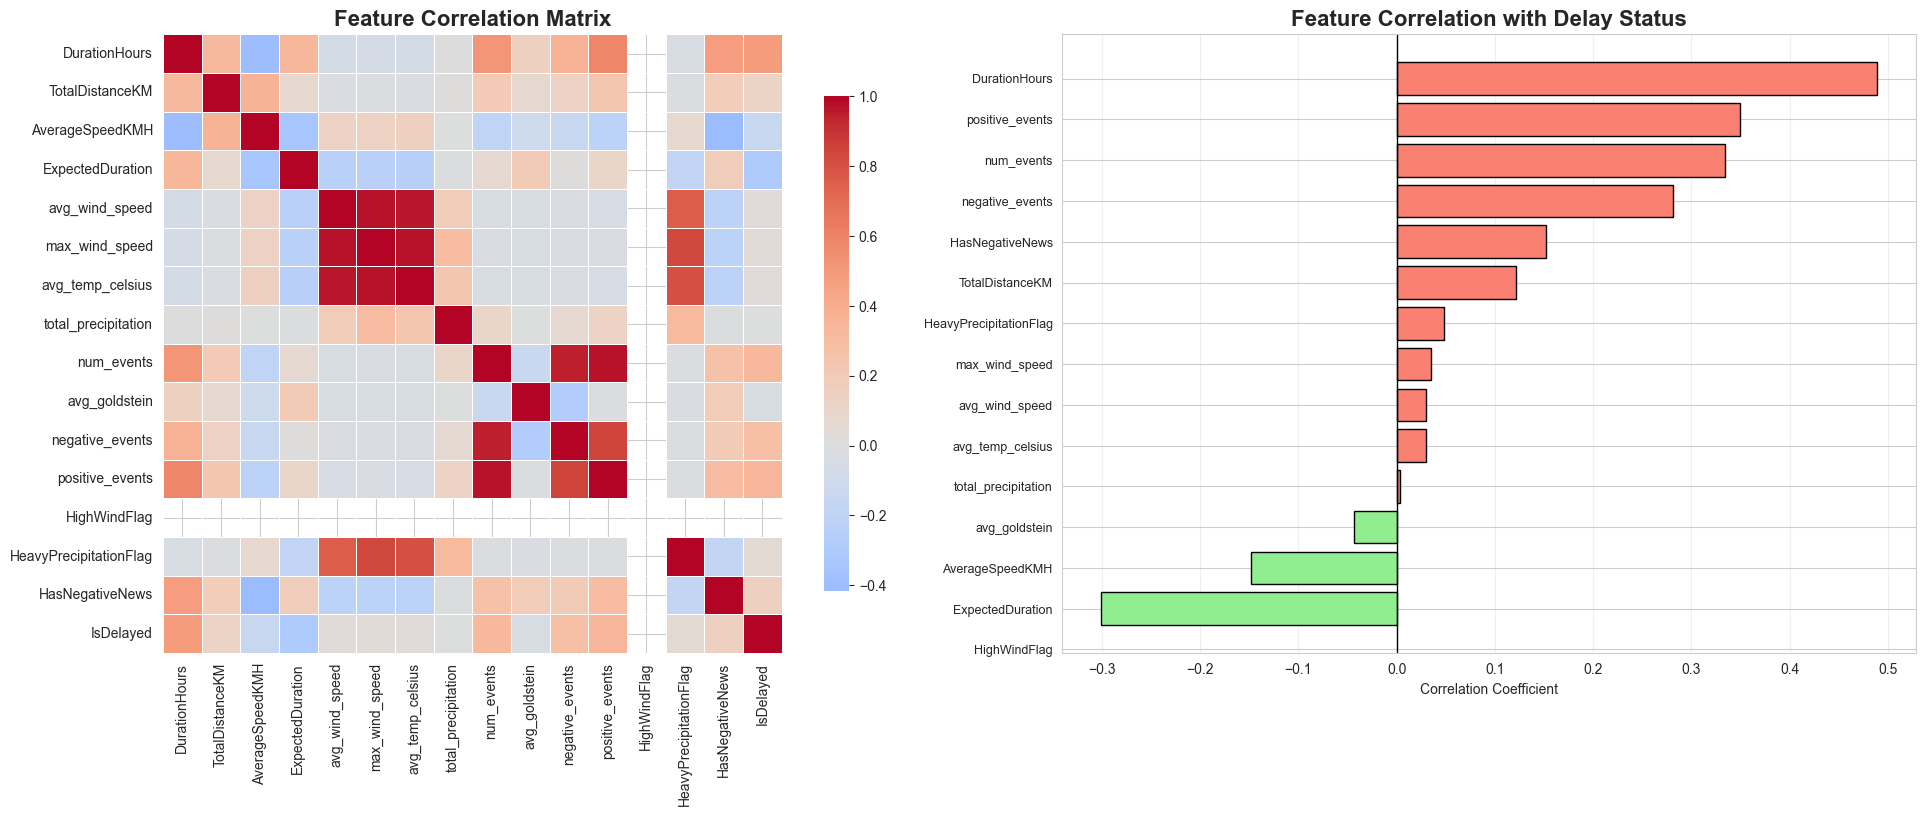


📊 Top Positive Correlations with Delay:
   DurationHours: 0.489
   positive_events: 0.349
   num_events: 0.334
   negative_events: 0.281
   HasNegativeNews: 0.152

📊 Top Negative Correlations with Delay:
   total_precipitation: 0.003
   avg_goldstein: -0.043
   AverageSpeedKMH: -0.149
   ExpectedDuration: -0.301
   HighWindFlag: nan

4. COMBINED WEATHER + NEWS IMPACT ON DELAYS


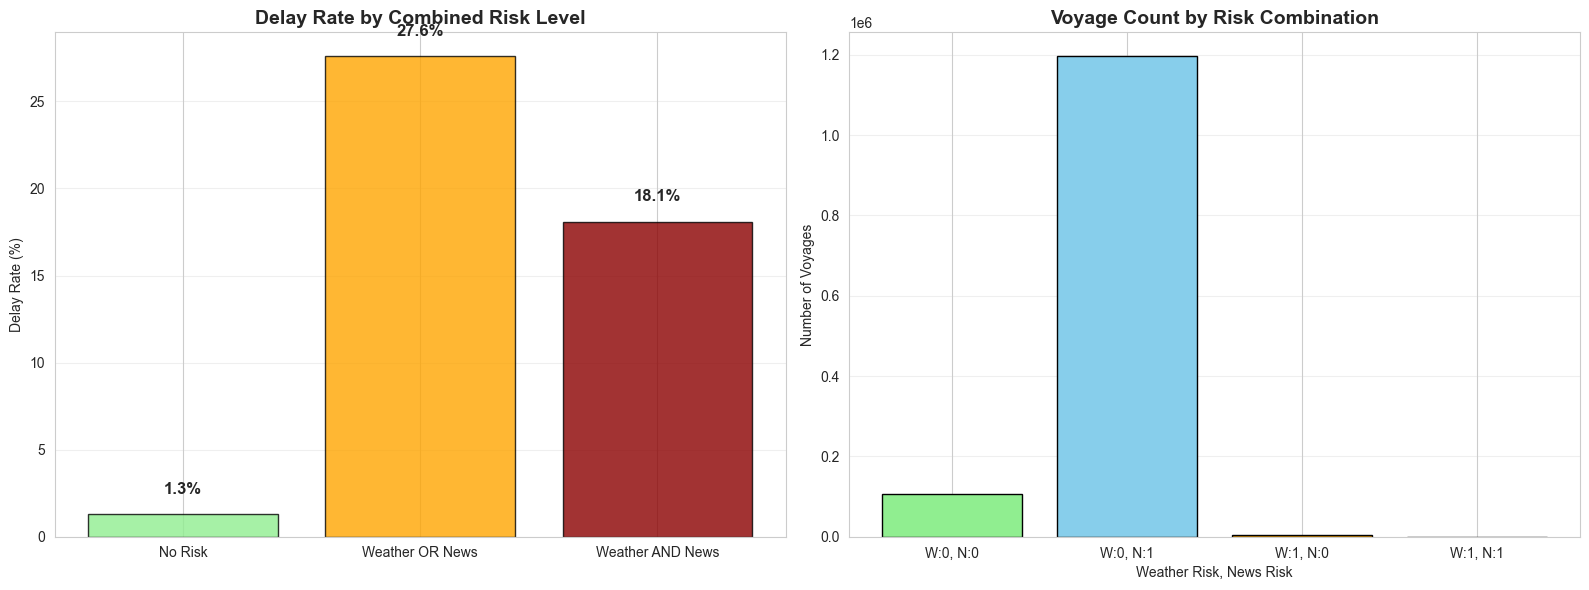


⚠️  Combined Risk Analysis:
   No Risk: 107,401 voyages, 1.3% delay rate
   Weather OR News: 1,200,361 voyages, 27.6% delay rate
   Weather AND News: 459 voyages, 18.1% delay rate

✅ INTEGRATED DATASET EXPLORATION COMPLETE!

📁 All visualizations saved to: graphical analysis/integrated_data/

   Generated files:
   - target_variable_analysis.png
   - temporal_patterns.png
   - feature_correlations.png
   - combined_impact_analysis.png

💡 Focus: Target variable insights & feature impact on delays
   (Individual weather/news distributions covered in separate notebooks)



In [1]:
# ============================================================================
# DATA UNDERSTANDING: INTEGRATED DATASET
# Focus: Target Variable & Feature Impact on Delays
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

# ============================================================================
# CREATE OUTPUT FOLDER
# ============================================================================

OUTPUT_FOLDER = 'graphical analysis/integrated_data'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

print("="*80)
print("INTEGRATED DATASET EXPLORATION - TRAINING SET (2020-2023)")
print("="*80)
print(f"📁 Output folder: {OUTPUT_FOLDER}")

# ============================================================================
# LOAD DATA
# ============================================================================

train_file = 'train_2020_2023.csv'
df = pd.read_csv(train_file, parse_dates=['StartTime', 'EndTime'])

print(f"\n📊 Dataset Overview:")
print(f"   Total voyages: {len(df):,}")
print(f"   Date range: {df['StartTime'].min().date()} to {df['EndTime'].max().date()}")
print(f"   Features: {df.shape[1]}")
print(f"   Years: {sorted(df['StartYear'].unique())}")

# ============================================================================
# 1. TARGET VARIABLE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("1. TARGET VARIABLE ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Delay classification distribution
delay_counts = df['IsDelayed'].value_counts()
colors_delay = ['lightgreen', 'salmon']
axes[0, 0].bar(['Not Delayed', 'Delayed'], delay_counts.values, color=colors_delay, edgecolor='black')
axes[0, 0].set_title('Voyage Delay Classification', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Number of Voyages')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(delay_counts.values):
    axes[0, 0].text(i, v + len(df)*0.01, f'{v:,}\n({v/len(df)*100:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')

# 2. Duration distribution
axes[0, 1].hist(df['DurationHours'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(df['DurationHours'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["DurationHours"].mean():.1f}h')
axes[0, 1].axvline(df['DurationHours'].median(), color='green', linestyle='--', linewidth=2, 
                   label=f'Median: {df["DurationHours"].median():.1f}h')
axes[0, 1].set_title('Voyage Duration Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Duration (hours)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Delay hours distribution
axes[0, 2].hist(df['DelayHours'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[0, 2].axvline(0, color='black', linestyle='-', linewidth=2, label='On Time')
axes[0, 2].axvline(df['DelayHours'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["DelayHours"].mean():.1f}h')
axes[0, 2].set_title('Delay Hours Distribution', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Delay (hours)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Delay percentage distribution
axes[1, 0].hist(df['DelayPercentage'], bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(30, color='red', linestyle='--', linewidth=2, label='30% Threshold')
axes[1, 0].axvline(0, color='black', linestyle='-', linewidth=1)
axes[1, 0].set_title('Delay Percentage Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Delay Percentage (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Expected vs Actual duration scatter
sample_size = min(10000, len(df))
sample_df = df.sample(sample_size, random_state=42)
axes[1, 1].scatter(sample_df['ExpectedDuration'], sample_df['DurationHours'], 
                   alpha=0.3, s=5, c=sample_df['IsDelayed'], cmap='RdYlGn_r')
axes[1, 1].plot([df['ExpectedDuration'].min(), df['ExpectedDuration'].max()], 
                [df['ExpectedDuration'].min(), df['ExpectedDuration'].max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[1, 1].set_title('Expected vs Actual Duration', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Expected Duration (hours)')
axes[1, 1].set_ylabel('Actual Duration (hours)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Statistics table
target_stats = pd.DataFrame({
    'Metric': ['Duration (h)', 'Expected (h)', 'Delay (h)', 'Delay (%)', 'Is Delayed'],
    'Mean': [df['DurationHours'].mean(), df['ExpectedDuration'].mean(), 
             df['DelayHours'].mean(), df['DelayPercentage'].mean(), 
             df['IsDelayed'].mean()],
    'Median': [df['DurationHours'].median(), df['ExpectedDuration'].median(), 
               df['DelayHours'].median(), df['DelayPercentage'].median(), 
               df['IsDelayed'].median()],
    'Std': [df['DurationHours'].std(), df['ExpectedDuration'].std(), 
            df['DelayHours'].std(), df['DelayPercentage'].std(), 
            df['IsDelayed'].std()]
})

axes[1, 2].axis('off')
formatted_data = []
for idx, row in target_stats.iterrows():
    formatted_row = [row['Metric']]
    formatted_row.extend([f'{val:.2f}' for val in [row['Mean'], row['Median'], row['Std']]])
    formatted_data.append(formatted_row)

table = axes[1, 2].table(cellText=formatted_data, 
                         colLabels=target_stats.columns,
                         cellLoc='center', loc='center',
                         colWidths=[0.25, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)
for i in range(len(target_stats.columns)):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')
axes[1, 2].set_title('Target Variable Statistics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(f'{OUTPUT_FOLDER}/target_variable_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n🎯 Target Variable Statistics:")
print(f"   Delayed voyages: {df['IsDelayed'].sum():,} ({df['IsDelayed'].mean()*100:.1f}%)")
print(f"   Average duration: {df['DurationHours'].mean():.1f}h (median: {df['DurationHours'].median():.1f}h)")
print(f"   Average delay: {df['DelayHours'].mean():.1f}h (median: {df['DelayHours'].median():.1f}h)")

# ============================================================================
# 2. TEMPORAL PATTERNS OF DELAYS
# ============================================================================

print("\n" + "="*80)
print("2. TEMPORAL PATTERNS OF DELAYS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Delays by year
yearly_delays = df.groupby('StartYear')['IsDelayed'].agg(['sum', 'mean', 'count'])
axes[0, 0].bar(yearly_delays.index, yearly_delays['mean']*100, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Delay Rate by Year', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Delay Rate (%)')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, (idx, row) in enumerate(yearly_delays.iterrows()):
    axes[0, 0].text(idx, row['mean']*100 + 1, f'{row["mean"]*100:.1f}%', 
                    ha='center', va='bottom')

# 2. Delays by month
monthly_delays = df.groupby('StartMonth')['IsDelayed'].mean() * 100
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 1].plot(range(1, 13), monthly_delays.values, marker='o', linewidth=2, markersize=8, color='red')
axes[0, 1].fill_between(range(1, 13), monthly_delays.values, alpha=0.3, color='red')
axes[0, 1].set_title('Delay Rate by Month', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Delay Rate (%)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names)
axes[0, 1].grid(True, alpha=0.3)

# 3. Delays by day of week
dow_delays = df.groupby('StartDayOfWeek')['IsDelayed'].mean() * 100
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0, 2].bar(range(7), dow_delays.values, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('Delay Rate by Day of Week', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Day of Week')
axes[0, 2].set_ylabel('Delay Rate (%)')
axes[0, 2].set_xticks(range(7))
axes[0, 2].set_xticklabels(dow_names)
axes[0, 2].grid(True, alpha=0.3, axis='y')

# 4. Voyage count by month
monthly_counts = df.groupby('StartMonth').size()
axes[1, 0].bar(range(1, 13), monthly_counts.values, color='mediumseagreen', edgecolor='black')
axes[1, 0].set_title('Voyage Count by Month', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Voyages')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(month_names)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. Average delay hours by quarter
quarterly_delay = df.groupby('StartQuarter')['DelayHours'].mean()
axes[1, 1].bar(['Q1', 'Q2', 'Q3', 'Q4'], quarterly_delay.values, color='coral', edgecolor='black')
axes[1, 1].set_title('Average Delay Hours by Quarter', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Quarter')
axes[1, 1].set_ylabel('Average Delay (hours)')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(quarterly_delay.values):
    axes[1, 1].text(i, v + 0.5, f'{v:.1f}h', ha='center', va='bottom')

# 6. Delays by hour of day
hourly_delays = df.groupby('StartHour')['IsDelayed'].mean() * 100
axes[1, 2].plot(range(24), hourly_delays.values, marker='o', linewidth=2, markersize=6, color='purple')
axes[1, 2].fill_between(range(24), hourly_delays.values, alpha=0.3, color='purple')
axes[1, 2].set_title('Delay Rate by Start Hour', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Hour of Day')
axes[1, 2].set_ylabel('Delay Rate (%)')
axes[1, 2].set_xticks(range(0, 24, 3))
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_FOLDER}/temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📅 Temporal Insights:")
print(f"   Highest delay rate: {month_names[monthly_delays.idxmax()-1]} ({monthly_delays.max():.1f}%)")
print(f"   Lowest delay rate: {month_names[monthly_delays.idxmin()-1]} ({monthly_delays.min():.1f}%)")
print(f"   Busiest month: {month_names[monthly_counts.idxmax()-1]} ({monthly_counts.max():,} voyages)")

# ============================================================================
# 3. FEATURE CORRELATIONS WITH DELAY TARGET
# ============================================================================

print("\n" + "="*80)
print("3. FEATURE CORRELATIONS WITH DELAY TARGET")
print("="*80)

# Select key features for correlation analysis (use AverageSpeedKMH instead of calculating AvgSpeed)
key_features = [
    'DurationHours', 'TotalDistanceKM', 'AverageSpeedKMH', 'ExpectedDuration',
    'avg_wind_speed', 'max_wind_speed', 'avg_temp_celsius', 'total_precipitation',
    'num_events', 'avg_goldstein', 'negative_events', 'positive_events',
    'HighWindFlag', 'HeavyPrecipitationFlag', 'HasNegativeNews', 'IsDelayed'
]

# Filter features that exist in dataframe
available_features = [f for f in key_features if f in df.columns]
corr_matrix = df[available_features].corr()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Full correlation heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Feature Correlation Matrix', fontsize=16, fontweight='bold')

# 2. Correlation with target (IsDelayed)
target_corr = corr_matrix['IsDelayed'].drop('IsDelayed').sort_values(ascending=False)
colors_corr = ['salmon' if x > 0 else 'lightgreen' for x in target_corr.values]
axes[1].barh(range(len(target_corr)), target_corr.values, color=colors_corr, edgecolor='black')
axes[1].set_yticks(range(len(target_corr)))
axes[1].set_yticklabels(target_corr.index, fontsize=9)
axes[1].set_title('Feature Correlation with Delay Status', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].axvline(0, color='black', linestyle='-', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig(f'{OUTPUT_FOLDER}/feature_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Top Positive Correlations with Delay:")
for feature, corr_val in target_corr.head(5).items():
    print(f"   {feature}: {corr_val:.3f}")

print(f"\n📊 Top Negative Correlations with Delay:")
for feature, corr_val in target_corr.tail(5).items():
    print(f"   {feature}: {corr_val:.3f}")

# ============================================================================
# 4. COMBINED WEATHER + NEWS IMPACT ON DELAYS
# ============================================================================

print("\n" + "="*80)
print("4. COMBINED WEATHER + NEWS IMPACT ON DELAYS")
print("="*80)

# Create combined risk categories
df['WeatherRisk'] = ((df['HighWindFlag'] == 1) | (df['HeavyPrecipitationFlag'] == 1)).astype(int)
df['NewsRisk'] = (df['HasNegativeNews'] == 1).astype(int)
df['CombinedRisk'] = df['WeatherRisk'] + df['NewsRisk']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Delay rate by combined risk level
combined_risk_delays = df.groupby('CombinedRisk')['IsDelayed'].mean() * 100
risk_labels = ['No Risk', 'Weather OR News', 'Weather AND News']
colors_risk = ['lightgreen', 'orange', 'darkred'][:len(combined_risk_delays)]
axes[0].bar(range(len(combined_risk_delays)), combined_risk_delays.values, 
            color=colors_risk, edgecolor='black', alpha=0.8)
axes[0].set_title('Delay Rate by Combined Risk Level', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Delay Rate (%)')
axes[0].set_xticks(range(len(combined_risk_delays)))
axes[0].set_xticklabels([risk_labels[i] for i in range(len(combined_risk_delays))])
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(combined_risk_delays.values):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# 2. Sample counts by risk combination
risk_counts = df.groupby(['WeatherRisk', 'NewsRisk']).size().reset_index(name='count')
risk_counts['label'] = risk_counts.apply(
    lambda x: f"W:{x['WeatherRisk']}, N:{x['NewsRisk']}", axis=1
)
axes[1].bar(range(len(risk_counts)), risk_counts['count'], 
            color=['lightgreen', 'skyblue', 'orange', 'darkred'][:len(risk_counts)], 
            edgecolor='black')
axes[1].set_title('Voyage Count by Risk Combination', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Voyages')
axes[1].set_xlabel('Weather Risk, News Risk')
axes[1].set_xticks(range(len(risk_counts)))
axes[1].set_xticklabels(risk_counts['label'], rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(f'{OUTPUT_FOLDER}/combined_impact_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n⚠️  Combined Risk Analysis:")
for risk_level in range(len(combined_risk_delays)):
    count = (df['CombinedRisk'] == risk_level).sum()
    rate = combined_risk_delays.iloc[risk_level]
    label = risk_labels[risk_level] if risk_level < len(risk_labels) else f"Risk Level {risk_level}"
    print(f"   {label}: {count:,} voyages, {rate:.1f}% delay rate")

# ============================================================================
# COMPLETION MESSAGE
# ============================================================================

print("\n" + "="*80)
print("✅ INTEGRATED DATASET EXPLORATION COMPLETE!")
print("="*80)
print(f"\n📁 All visualizations saved to: {OUTPUT_FOLDER}/")
print(f"\n   Generated files:")
print(f"   - target_variable_analysis.png")
print(f"   - temporal_patterns.png")
print(f"   - feature_correlations.png")
print(f"   - combined_impact_analysis.png")
print("\n💡 Focus: Target variable insights & feature impact on delays")
print("   (Individual weather/news distributions covered in separate notebooks)")
print("\n" + "="*80)